# 2023's IT Jobs Prediction
By : Abdan Hafidz (50542431021)

<p> Here we will create clustering for trending job data in 2023. Clustering will use:
<ul>
<li>K Means</li>
<li>DBScan</li>
<li>Agglomerative Hierarchical</li>
</ul>

</p>

### Import Libraries

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

### Read Datasets

In [5]:
df = pd.read_csv('it_jobs_2030.csv')

### 1. Exploratory Data Analytical (EDA)

In [6]:
df.head()

,Domain,Job Title,Projected Growth by 2030
0,Augmented Reality (AR),Engineer,77%
1,5G Networks,Developer,70%
2,Cybersecurity,Engineer,36%
3,Internet of Things (IoT),Consultant,138%
4,Cybersecurity,Analyst,86%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13606025 entries, 0 to 13606024
Data columns (total 3 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Domain                    object
 1   Job Title                 object
 2   Projected Growth by 2030  object
dtypes: object(3)
memory usage: 311.4+ MB


In [8]:
df.describe().T

,count,unique,top,freq
Domain,13606025,13,Artificial Intelligence,1047730
Job Title,13606025,6,Architect,2269578
Projected Growth by 2030,13606025,72,77%,543372


In [9]:
df.head()

,Domain,Job Title,Projected Growth by 2030
0,Augmented Reality (AR),Engineer,77%
1,5G Networks,Developer,70%
2,Cybersecurity,Engineer,36%
3,Internet of Things (IoT),Consultant,138%
4,Cybersecurity,Analyst,86%


In [10]:
df.tail()

,Domain,Job Title,Projected Growth by 2030
13606020,Blockchain,Developer,10%
13606021,Robotics,Developer,19%
13606022,Cybersecurity,Engineer,105%
13606023,Cybersecurity,Analyst,44%
13606024,Cybersecurity,Manager,84%


In [11]:
df.isnull().sum()

Domain                      0
Job Title                   0
Projected Growth by 2030    0
dtype: int64

In [12]:
df.duplicated(subset=['Domain', 'Job Title']).sum()

13605947

### *Pre - Processing*
Convert Data Type `Projected Growth by 2030` from percentage to Decimal

In [13]:
df['Projected Growth by 2030'] = df['Projected Growth by 2030'].str.replace('%', '').astype(float) / 100

In [25]:
df.head()

,Domain,Job Title,Projected Growth by 2030,is_duplicate
0,Augmented Reality (AR),Engineer,0.77,False
1,5G Networks,Developer,0.70,False
2,Cybersecurity,Engineer,0.36,False
3,Internet of Things (IoT),Consultant,1.38,False
4,Cybersecurity,Analyst,0.86,False


In [15]:
df['is_duplicate'] = df.duplicated(subset=['Domain', 'Job Title'])

In [16]:
duplicates = df[df['is_duplicate']]
print(duplicates)

                            Domain   Job Title  Projected Growth by 2030  \
8                   Data Analytics     Manager                      0.64   
21        Internet of Things (IoT)  Consultant                      1.26   
24                 Cloud Computing   Architect                      0.44   
30                     5G Networks  Consultant                      0.53   
31                     5G Networks   Architect                      1.07   
...                            ...         ...                       ...   
13606020                Blockchain   Developer                      0.10   
13606021                  Robotics   Developer                      0.19   
13606022             Cybersecurity    Engineer                      1.05   
13606023             Cybersecurity     Analyst                      0.44   
13606024             Cybersecurity     Manager                      0.84   

          is_duplicate  
8                 True  
21                True  
24          

In [17]:
pd.crosstab(index=df['Domain'], columns=df['Job Title'])


Job Title,Analyst,Architect,Consultant,Developer,Engineer,Manager
Domain,,,,,,
5G Networks,174838,174331,174508,174332,175049,174344
Artificial Intelligence,173976,174669,174200,175047,175203,174635
Augmented Reality (AR),174836,174008,174936,174232,174463,174424
Blockchain,174243,175215,174314,174579,174280,174507
Cloud Computing,174068,174883,174355,174112,174265,174504
Cybersecurity,174449,174356,174720,174440,173726,174546
Data Analytics,174620,174457,174862,174505,174025,174334
DevOps,174533,174102,174267,174302,174310,174503
Edge Computing,174825,174553,173708,174380,174998,174277


In [18]:
df.isna().sum()

Domain                      0
Job Title                   0
Projected Growth by 2030    0
is_duplicate                0
dtype: int64

In [19]:
df.nunique()

Domain                      13
Job Title                    6
Projected Growth by 2030    72
is_duplicate                 2
dtype: int64

In [20]:
print("** JOBS Domain / Category ** ")
print("----------------------------- ")
# for Domain in df.Domain.unique():
#     print(Domain)
df["Domain"].value_counts().rename_axis('Domain').reset_index(name='counts').sort_values(by='counts')



** JOBS Domain / Category ** 
----------------------------- 


,Domain,counts
12,Internet of Things (IoT),1045055
11,Robotics,1046001
10,DevOps,1046017
9,Cloud Computing,1046187
8,Cybersecurity,1046237
7,Virtual Reality (VR),1046363
6,Edge Computing,1046741
5,Data Analytics,1046803
4,Augmented Reality (AR),1046899
3,Blockchain,1047138


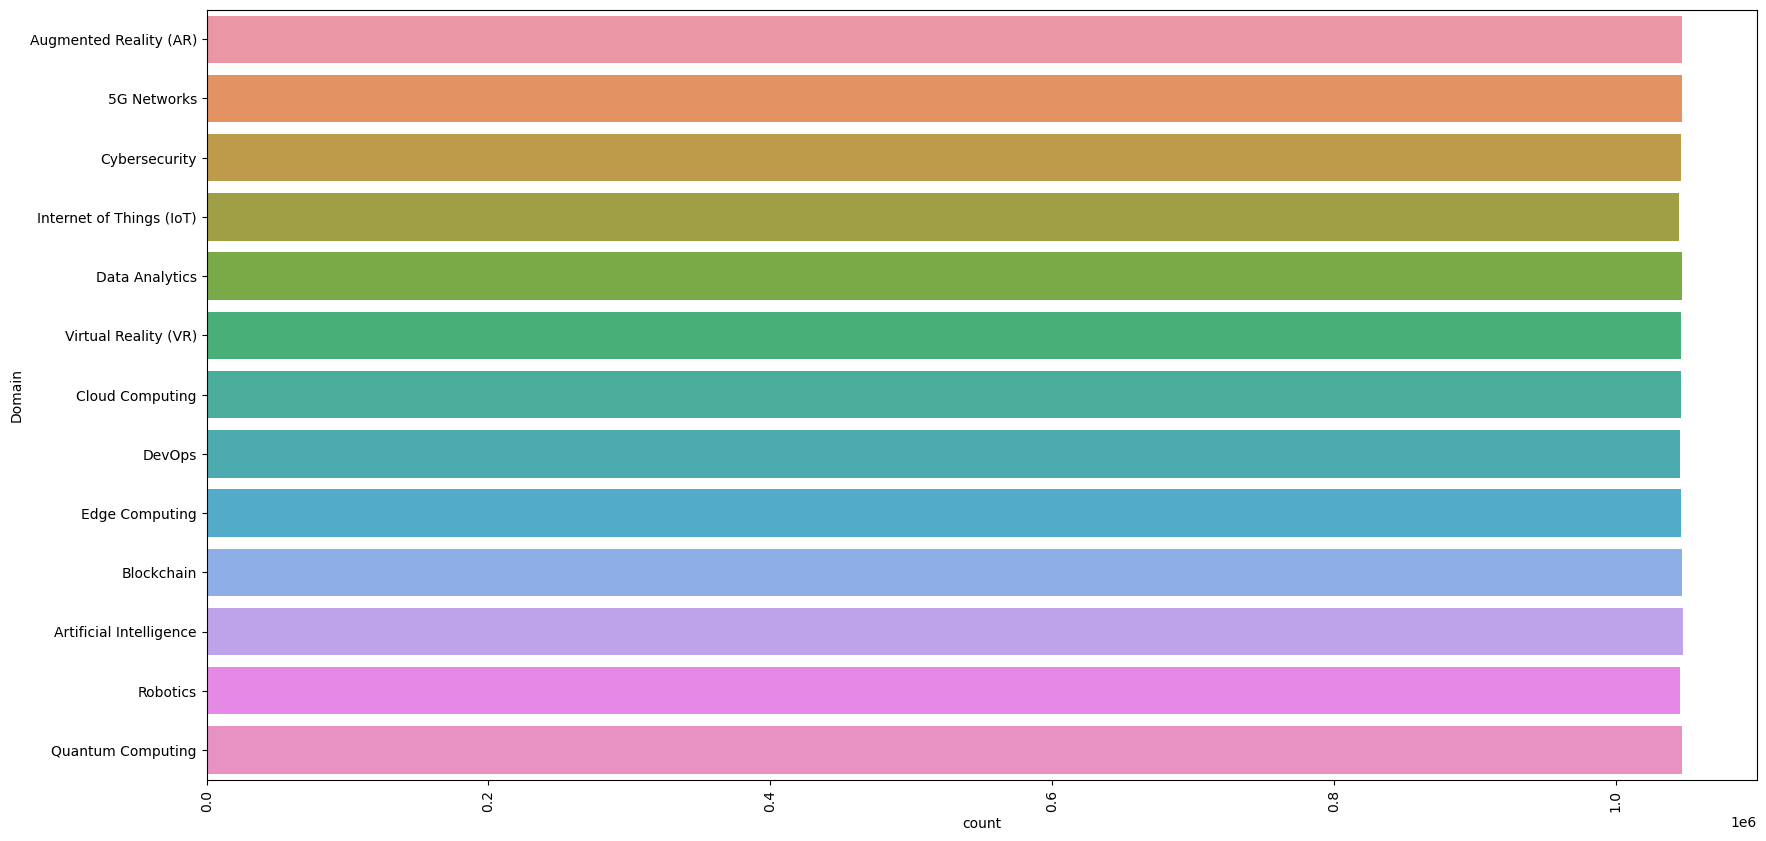

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,y='Domain')
plt.xticks(rotation=90)
plt.show()

We can see that the field of Artificial Intelligence is the most numerous and IoT is the least

In [22]:
print("** JOB Title / Category ** ")
print("----------------------------- ")
# for Domain in df.Domain.unique():
#     print(Domain)
df["Job Title"].value_counts().rename_axis('Job Title').reset_index(name='counts').sort_values(by='counts')

** JOB Title / Category ** 
----------------------------- 


,Job Title,counts
5,Analyst,2266591
4,Engineer,2266984
3,Developer,2267069
2,Consultant,2267291
1,Manager,2268512
0,Architect,2269578


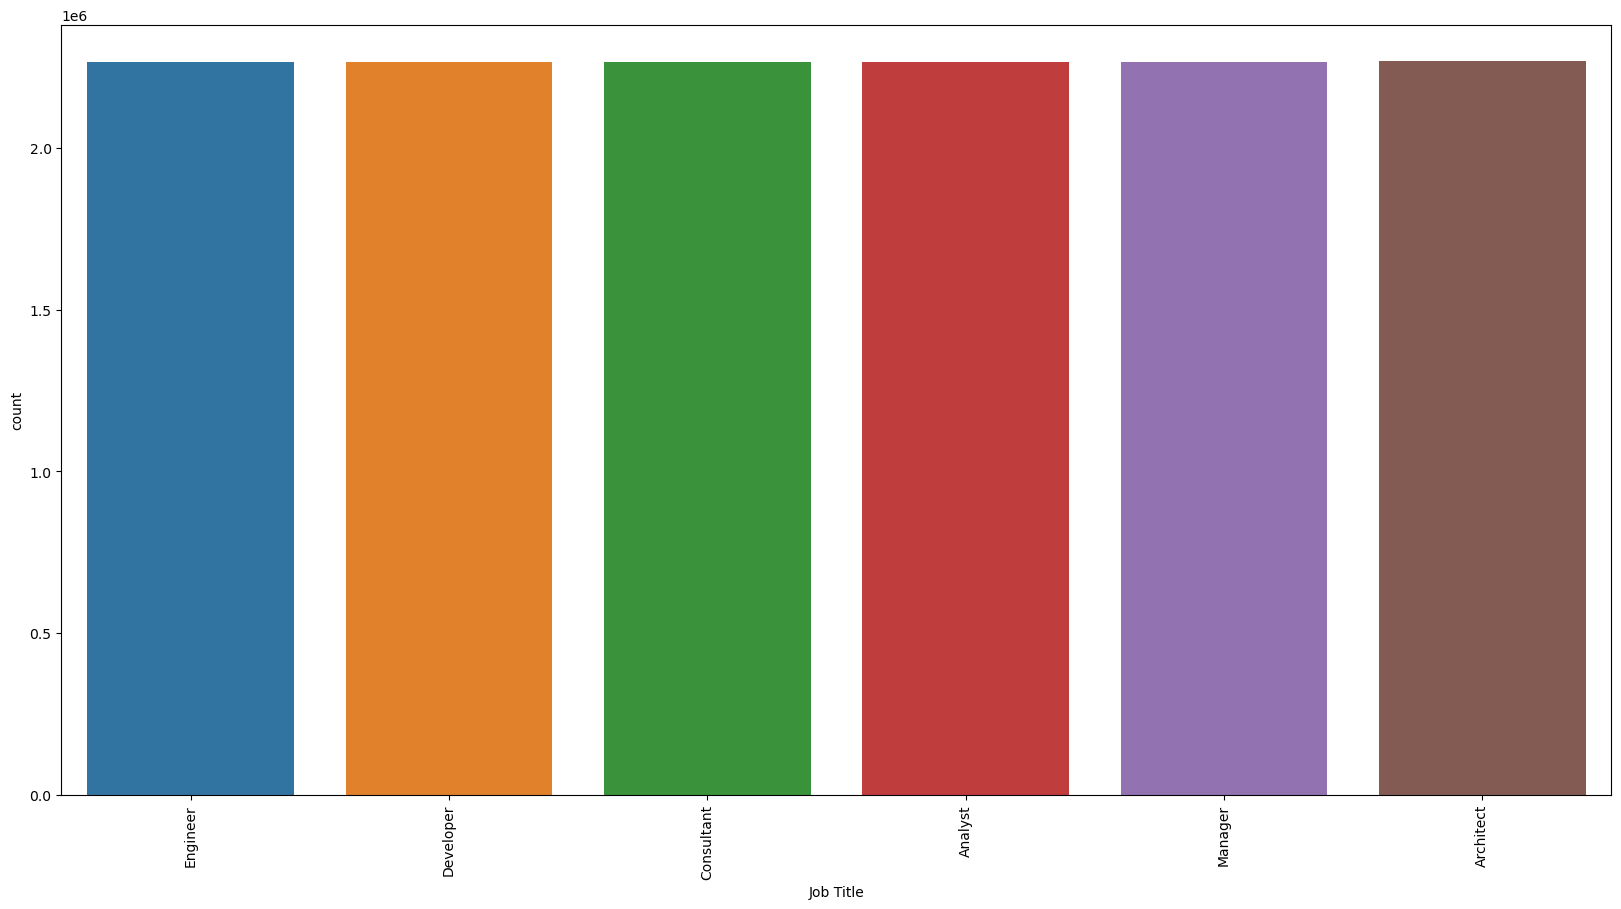

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Job Title')
plt.xticks(rotation=90)
plt.show()

It can be seen that people most tend to choose to become an Architect and rarely become an Analyst. We make the assumption that this is because Analysts have less significant tasks and do not really require Engineering principles due to the nature of historical data, while Architect requires more dominant Engineering principles, thus making this position more feasible to have with a large salary.

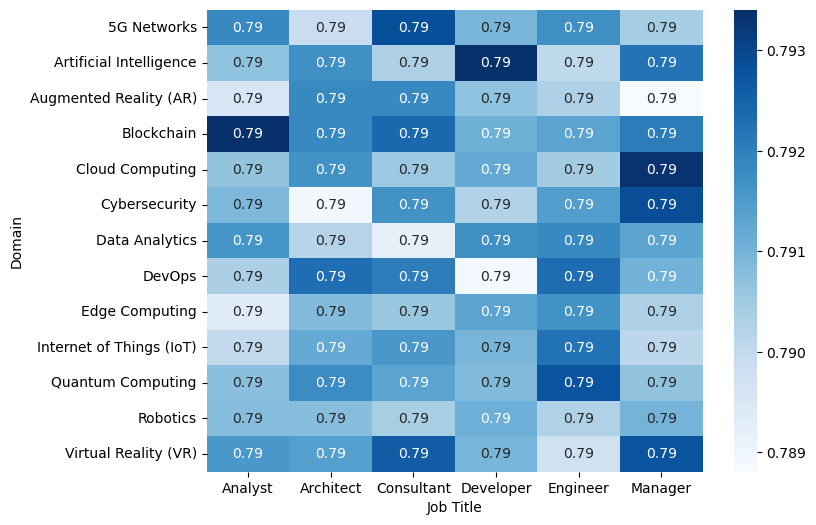

In [24]:

matrix = pd.crosstab(index=df['Domain'], columns=df['Job Title'], values=df['Projected Growth by 2030'], aggfunc=np.mean)

plt.figure(figsize=(8, 6))  # Ukuran plot
sns.heatmap(matrix, annot=True, cmap="Blues")  # annot=True untuk menampilkan nilai, fmt="d" untuk integer
plt.show()


We can find that for the position:

- Manager, the person who is most interested in the field of Quantum Computing, we assume that Engineering in this field has not developed rapidly and is still in the research stage, so it is likely that people prioritize managerial skills in their Research field plus Quantum Computing is the most popular field in terms of Investment because it is new, fresh and up-to-date. Reference: https://sifted.eu/articles/investors-quantum-as-a-service

- Engineer,
The engineering field is very interested in Artificial Intelligence (AI) because of its ability to automate complex processes and increase efficiency and innovation. AI enables improved product design, system optimization, and predictive maintenance, which previously required a lot of time and money. In addition, AI can leverage big data and deep learning to create more sophisticated solutions, making it a very important tool in the industrial revolution 4.0. [https://www.nber.org/papers/w24449], [https://www.mdpi.com/journal/electronics/special_issues/AI_MechanicalEngineering]